In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
june = pd.read_csv('CRMLSSold202406_filled.csv')
july = pd.read_csv('CRMLSSold202407_filled.csv')
august = pd.read_csv('CRMLSSold202408.csv')
sep = pd.read_csv('CRMLSSold202409.csv')
oct = pd.read_csv('CRMLSSold202410.csv')
nov = pd.read_csv('CRMLSSold202411.csv')

In [3]:
june

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled
0,RanchoSoutheast,RanchoSoutheast,NaN,True,NaN,NaN,True,1250.0,543227709,pat@patowen.com,...,0.0,False,0.0,Menifee Union,92587,0.0,12197.0,NaN,True,True
1,BeverlyHillsGreaterLA,BeverlyHillsGreaterLA,NaN,True,NaN,NaN,NaN,2100000.0,531525691,andrew@epicpropertygroup.com,...,NaN,False,NaN,NaN,91206,NaN,437284.0,NaN,False,False
2,JoshuaTreeGateway,JoshuaTreeGateway,NaN,True,NaN,NaN,NaN,179000.0,531017430,bryan@jtmodern.com,...,NaN,False,NaN,NaN,92252,0.0,875556.0,NaN,True,True
3,HighDesert,HighDesert,NaN,True,NaN,NaN,NaN,14500.0,530411639,trustdee@aol.com,...,NaN,False,NaN,NaN,92345,NaN,871200.0,NaN,True,True
4,Southland,Southland,NaN,True,NaN,NaN,NaN,720000.0,526412917,karen@goldenoakrealty.com,...,NaN,False,NaN,NaN,93510,0.0,2576054.0,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24323,HighDesert,HighDesert,NaN,True,NaN,NaN,NaN,3600000.0,1002458546,rb@cbcdesert.com,...,NaN,False,NaN,NaN,92344,NaN,3300977.0,NaN,True,True
24324,Southland,Southland,NaN,True,NaN,NaN,NaN,8500.0,1001922099,tompaul@kw.com,...,NaN,False,NaN,NaN,93536,0.0,108900.0,NaN,True,True
24325,Fresno,Fresno,NaN,True,NaN,NaN,NaN,45000.0,1001759754,vickie@realtyconcepts.com,...,NaN,False,NaN,NaN,93643,200.0,33541.2,NaN,True,True
24326,Southland,Southland,NaN,True,NaN,NaN,NaN,22500.0,1001725703,ann@anntrussell.com,...,NaN,False,NaN,NaN,93560,0.0,221720.0,NaN,True,True


In [4]:
(june['PoolPrivateYN']).isna().sum()

3583

In [5]:
# Permutation test to confirm that homes with private pools cost more
grouped = june.groupby('PoolPrivateYN')['ClosePrice'].mean()
obs = grouped.loc[True] - grouped.loc[False]
print(f'observed difference between two groups: {obs}')

june_copy = june.copy()
diffs = []
# simulate 500 times, shuffle label of private pools
for i in range(500):
    june_copy['shuffled_pool'] = np.random.permutation(june_copy['PoolPrivateYN'])
    pool_groups = june_copy.groupby('shuffled_pool')['ClosePrice'].mean()
    stat = pool_groups[True] - pool_groups[False]
    diffs.append(stat)

diffs = np.array(diffs)
print(f'The p value is {(diffs >= obs).mean()}')

observed difference between two groups: 499859.7717617275
The p value is 0.0


Because the p value is low, we can conlude that having a pool increases house price

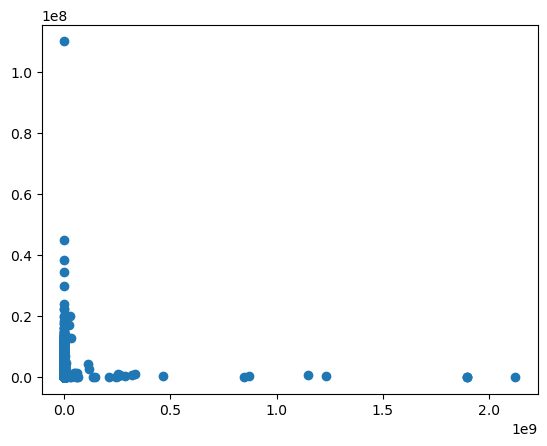

In [6]:
# Lot size doesn't have too much to do with list price
plt.scatter(june['LotSizeSquareFeet'], june['OriginalListPrice'])

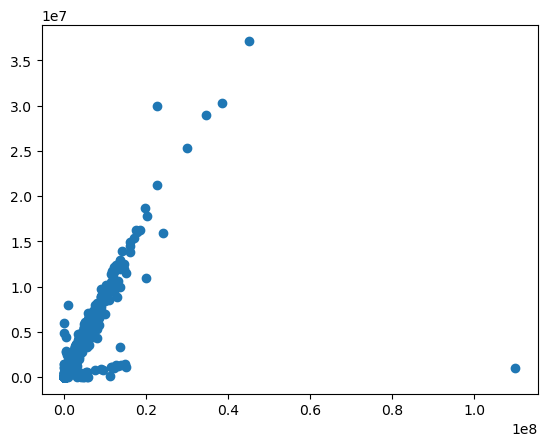

In [7]:
# Very strong linear positive assocation
plt.scatter(june['OriginalListPrice'], june['ClosePrice'])

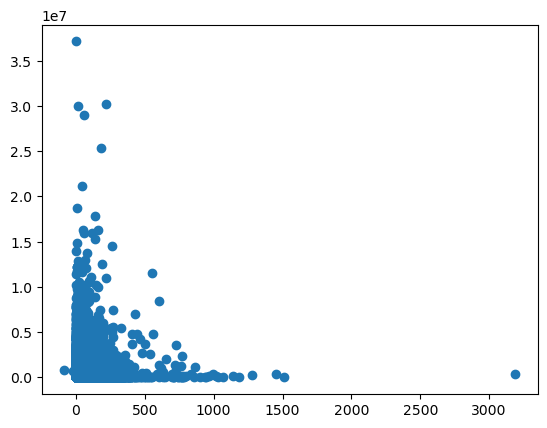

In [8]:
# Sort of a negative assocation? Prices drop dramatically after the 200 day mark
plt.scatter(june['DaysOnMarket'], june['ClosePrice'])

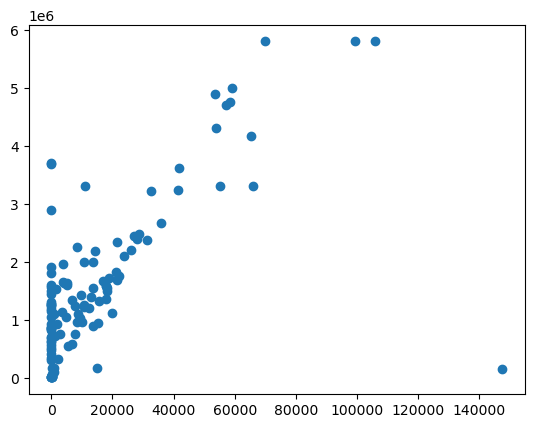

In [9]:
plt.scatter(june['TaxAnnualAmount'], june['ClosePrice'])

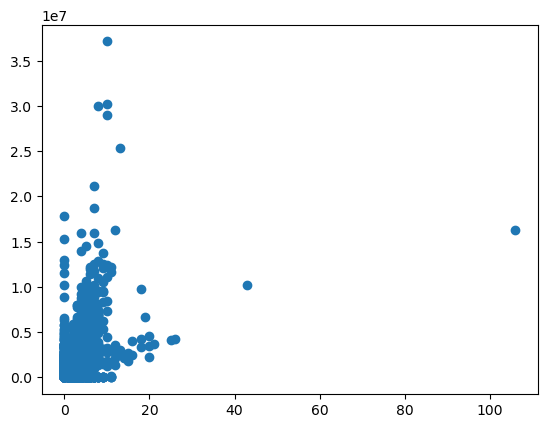

In [10]:
plt.scatter(june['BathroomsTotalInteger'], june['ClosePrice'])

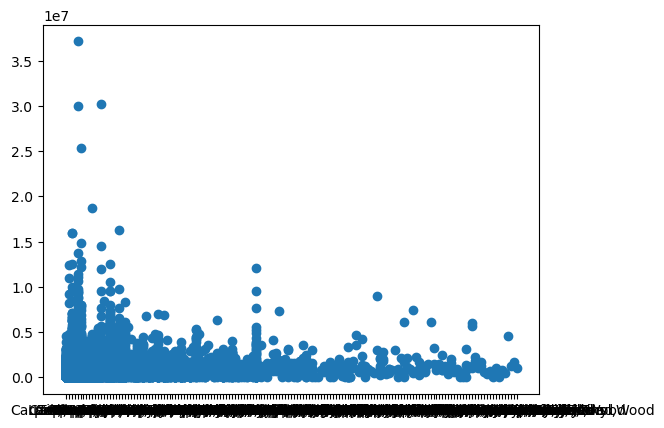

In [11]:
june_cleaned = june[['Flooring', 'ClosePrice']].dropna()
plt.scatter(june_cleaned['Flooring'], june_cleaned['ClosePrice'])

In [12]:
# Testing missing mechanism to see if missing values of elementary school correlate
# with lower housing prices since missing value could mean no elementary school nearby?
# In other words, missing value = lower price
june_copy = june.copy()
labels = june['ElementarySchool'].isna()
june_copy['school_missing'] = labels

grouped = june_copy.groupby('school_missing')['ClosePrice'].mean()

# observed difference of how much more the house costs if elementary school is not missing
obs = grouped.loc[False] - grouped.loc[True]
print(f'observed difference between two groups: {obs}')

diffs = []
# simulate 500 times, shuffle label of private pools
for i in range(500):
    june_copy['shuffled_school'] = np.random.permutation(june_copy['school_missing'])
    pool_groups = june_copy.groupby('shuffled_school')['ClosePrice'].mean()
    stat = pool_groups[False] - pool_groups[True]
    diffs.append(stat)

diffs = np.array(diffs)
print(f'The p value is {(diffs >= obs).mean()}')


observed difference between two groups: 528859.6278153324
The p value is 0.0


In [13]:
# If it helps, generalized permutation test for missingness and close price

# The column here is whether ElementarySchool is missing
column = 'BasementYN'

june_copy = june.copy()
labels = june[column].isna()
june_copy['is_missing'] = labels

grouped = june_copy.groupby('is_missing')['ClosePrice'].mean()

# observed difference of how much more the house costs if the value is NOT missing
# You may need to switch the order of subtraction in order for things to be more intuitive.
# In that case, rememeber to also switch the labels of True/False in the for loop
obs = grouped.loc[False] - grouped.loc[True]
print(f'observed difference in closing price between two groups: {obs}')

diffs = []
# simulate 500 times, shuffle labels
for i in range(500):
    june_copy['shuffled_labels'] = np.random.permutation(june_copy['is_missing'])
    pool_groups = june_copy.groupby('shuffled_labels')['ClosePrice'].mean()
    stat = pool_groups[False] - pool_groups[True]
    diffs.append(stat)

diffs = np.array(diffs)
print(f'The p value is {(diffs >= obs).mean()}')

observed difference in closing price between two groups: 697456.0200189933
The p value is 0.0


In [14]:
# Permutation test
label = 'AttachedGarageYN'
grouped = june.groupby(label)['ClosePrice'].mean()
obs = grouped.loc[True] - grouped.loc[False]
print(f'observed difference between two groups: {obs}')

june_copy = june.copy()
diffs = []
# simulate 500 times, shuffle labels
for i in range(500):
    june_copy['shuffled'] = np.random.permutation(june_copy[label])
    pool_groups = june_copy.groupby('shuffled')['ClosePrice'].mean()
    stat = pool_groups[True] - pool_groups[False]
    diffs.append(stat)

diffs = np.array(diffs)
print(f'The p value is {(diffs >= obs).mean()}')

observed difference between two groups: 192885.12308150053
The p value is 0.0


['ResidentialLease' 'Land' 'CommercialSale' 'Residential'
 'ResidentialIncome' 'CommercialLease' 'ManufacturedInPark'
 'BusinessOpportunity']


<BarContainer object of 8 artists>

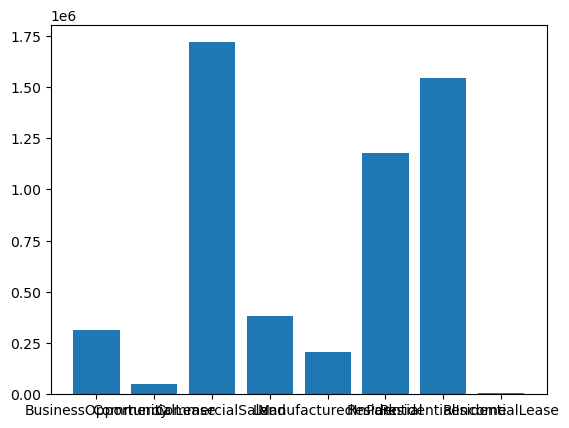

In [15]:
category = 'PropertyType'
print(june[category].unique())
categories_grouped = june.groupby(category)['ClosePrice'].mean()
plt.bar(categories_grouped.index, categories_grouped)

In [16]:
june.columns

Index(['BuyerAgentAOR', 'ListAgentAOR', 'Flooring', 'ViewYN', 'WaterfrontYN',
       'BasementYN', 'PoolPrivateYN', 'OriginalListPrice', 'ListingKey',
       'ListAgentEmail', 'CloseDate', 'ClosePrice', 'ListAgentFirstName',
       'ListAgentLastName', 'Latitude', 'Longitude', 'UnparsedAddress',
       'PropertyType', 'LivingArea', 'ListPrice', 'DaysOnMarket',
       'ListOfficeName', 'BuyerOfficeName', 'CoListOfficeName',
       'ListAgentFullName', 'CoListAgentFirstName', 'CoListAgentLastName',
       'BuyerAgentMlsId', 'BuyerAgentFirstName', 'BuyerAgentLastName',
       'FireplacesTotal', 'AssociationFeeFrequency', 'AboveGradeFinishedArea',
       'ListingKeyNumeric', 'MLSAreaMajor', 'TaxAnnualAmount',
       'CountyOrParish', 'MlsStatus', 'ElementarySchool', 'AttachedGarageYN',
       'ParkingTotal', 'BuilderName', 'PropertySubType', 'LotSizeAcres',
       'SubdivisionName', 'BuyerOfficeAOR', 'YearBuilt', 'StreetNumberNumeric',
       'ListingId', 'BathroomsTotalInteger', 'City', '

<BarContainer object of 12 artists>

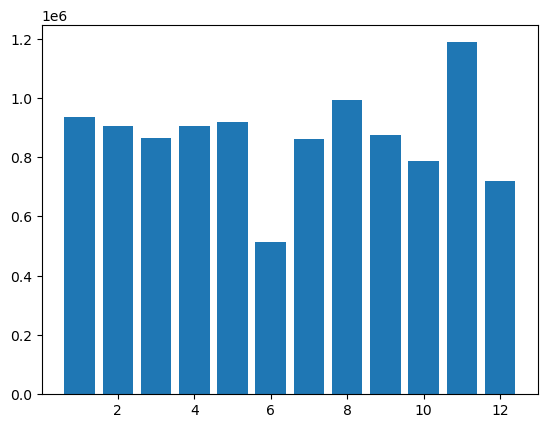

In [17]:
june_day = pd.to_datetime(june['ListingContractDate'])
june_copy = june.assign(list_month = june_day.dt.month)
category = 'list_month'
categories_grouped = june_copy.groupby(category)['ClosePrice'].mean()
plt.bar(categories_grouped.index, categories_grouped)

In [4]:
june['PropertyType'].unique()

array(['ResidentialLease', 'Land', 'CommercialSale', 'Residential',
       'ResidentialIncome', 'CommercialLease', 'ManufacturedInPark',
       'BusinessOpportunity'], dtype=object)

Features to use: PoolYN, ViewYN, OriginalListPrice (allowed?), DaysOnMarket, TaxAnnualAmount, BedroomsTotal, BathroomsTotalInteger, YearBuilt, BasementYN, LivingArea, PropertyType, PostalCode, 
AttachedGarageYN, Flooring